<a href="https://colab.research.google.com/github/chandan-source/Boston_house_price_prediction_model/blob/main/boston_house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing libraries to use library function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#df contains the file infromation which is in csv format
df_train=pd.read_csv("/content/Data.csv")


In [3]:
df_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
df_train.shape

(506, 14)

In [5]:
df_train['ZN'].unique()

array([ 18. ,   0. ,  12.5,  75. ,  21. ,  90. ,  85. , 100. ,  25. ,
        17.5,  80. ,  28. ,  45. ,  60. ,  95. ,  82.5,  30. ,  22. ,
        20. ,  40. ,  55. ,  52.5,  70. ,  34. ,  33. ,  35. ])

In [6]:
#getting the infromation of dataset such as no. of entries,data column,non-null count,data types etc..
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [7]:
l1=['NOX','B','CHAS']

In [8]:
#removing 3 column from the datset
df_train.drop(l1,axis=1,inplace=True)

In [9]:
df_train.head()

,CRIM,ZN,INDUS,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [10]:
df_train.shape

(506, 11)

In [11]:
df_train.dtypes

CRIM       float64
ZN         float64
INDUS      float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
LSTAT      float64
MEDV       float64
dtype: object

In [12]:
#converting dataframe into numpy array
X=df_train.iloc[:, 0:10].values
Y=df_train.iloc[:, 10].values

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
#splitting of the datset
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [15]:
x_train.shape,y_train.shape

((404, 10), (404,))

In [16]:
from sklearn.preprocessing import StandardScaler
scale_x=StandardScaler()
x_train=scale_x.fit_transform(x_train)
x_test=scale_x.fit_transform(x_test)

In [17]:
x_train.shape,y_train.shape

((404, 10), (404,))

In [18]:
# we use method of liner regression to train and test dataset
from sklearn.linear_model import LinearRegression
reg=LinearRegression(normalize=True)

In [ ]:
reg.fit(x_train,y_train)

In [20]:
Y_predict=reg.predict(x_train)

In [21]:
Y_predict

array([32.78223989, 32.43012487, 33.20761619, 22.01723645, 23.55588178,
       17.82638993, 19.70821149, 23.73212686, 23.82374767, 31.28442617,
       19.13113262, 15.34668113, 22.18853823, 21.41552375, 15.2956837 ,
       15.26058502, 17.48262764, 19.50552781, 23.88677019, 25.24951602,
       17.21697154, 20.28632889, 19.65426747, 23.97243759, 39.33104199,
        8.92046266, 16.68716978, 15.87869619, 24.74605662, 28.51294245,
       27.97415403, 17.40791316, 18.03958406,  5.36129176, 10.40152013,
       15.7672415 , 17.15846881, 20.26532683, 30.52347869, 34.10846556,
       12.81180628, 22.35851743, 14.45055024, 14.70737813, 19.61846419,
       17.98498706, 29.96414305, 20.83210706, 29.63246559, 25.11116676,
       17.49244671, 22.54374568, 16.23426473, 12.24990155, 27.69523823,
       22.25708871, 13.97803088, 26.52416436, 25.84750082, 14.65126931,
       31.42058525, 25.16528113, 31.44228784, 16.71584432,  5.53983942,
       19.81338649, 24.83198904, 33.84622967, 30.22517487,  8.82

In [22]:
#training score is 71.12%
reg.score(x_train,y_train)

0.7112801464515404

In [ ]:
reg.fit(x_test,y_test)
reg.score(x_test,y_test)
y_predict2=reg.predict(x_test)

In [24]:
y_predict2

array([26.28078954, 34.11337648, 26.70633574, 23.35310563, 25.70608545,
       17.98662599, 24.6027026 , 15.19077567, 10.5027088 , 19.86255886,
       16.60494549, 15.05234057,  9.57028646, 13.52726481, 33.01600756,
       16.49717487, 22.20214884, 29.19690742, 22.62872971, 19.21620005,
       20.10888851, 26.99750509, 21.12216268, 39.30827439, 16.17684872,
       25.25861802, 35.94505218, 18.32757431, 36.21136749, 15.21899608,
        7.4894815 , 18.56448727, 20.94691988, 19.18130598, 13.92362563,
       13.74221718, 25.37755111, 16.40200507, 16.34068761, 28.64073878,
       22.71452254, 42.0177071 , 14.62148527, 20.634153  , 22.29512881,
       17.63327433, 24.3325905 , 33.60694241, 15.22166115, 15.41805263,
       25.45244973, 27.87320837,  8.40318654, 14.46076672, 15.97207354,
       16.71018146, 16.74937851, 41.69881848, 25.06008232, 11.71138396,
       44.94450915, 16.90307574,  5.33227888, 15.89724653,  4.39453635,
       16.05301172, 19.28246489, 26.20062678, 20.75175508, 25.84

In [25]:
#testing score is 82.41%
reg.score(x_test,y_test)

0.8216343288743053

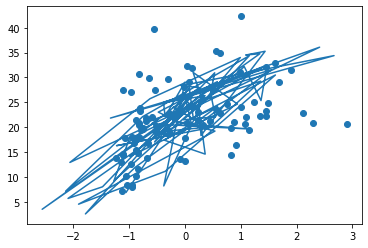

In [ ]:
plt.scatter(y_train,y_predict)
plt.plot(x_test[:, 3],y_predict2)
plt.show()

In [ ]:
reg.intercept_

22.237962962963003

In [ ]:
reg.coef_

array([-1.00547475,  1.5108556 ,  0.25089922,  1.80326085, -0.14337756,
       -2.4415094 ,  3.07605726, -3.48352161, -1.54701115, -5.21015633])